In [1]:
Final Project Submission
Please fill out:

Student name: Dirk Van Curan
Student pace: Full time
Scheduled project review date/time: August 23, 2019 9:30 am
Instructor name: Cristian

SyntaxError: invalid syntax (<ipython-input-1-0d6b2629f37d>, line 1)

Our approach to this model is to discover key variables that can help accurately determine sale price of a home in King County. Our first task will be to see what sorts of questions we can answer to solve business problems with data that is present in the raw data. Secondly, we will clean the data, eliminating any features that do not help solve our business propositions and adding any that can give better insight into what factors affect price. Once we have our initial model we will tweak features to fit our model to our split training data to later test on the test data for more accurate predictions. Our end goal would be to minimize error as much as possible, provide insights on what affects price, and develop a strategy around solving business questions posed.

In [2]:
# import modules needed for data analysis and get them ready for use in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from geopy import distance
import math
from sklearn.linear_model import LassoCV
ss = StandardScaler()
lr = LinearRegression()
lscv = LassoCV(max_iter=150000)
raw_data = pd.read_csv("kc_house_data.csv")

# Clean data by dropping variables that don't serve our business needs

In [3]:
drop_raw = raw_data.drop(['id', 'date', 'condition', 
                                      'sqft_above', 'sqft_basement', 'yr_renovated',
                                     'sqft_living15', 'sqft_lot15'], axis=1)
clean_data = drop_raw[drop_raw['bedrooms'] != 33].copy()
clean_data = clean_data.fillna(0)

In [4]:
#Make a new column to of the longitude and latitude to help determine businesses
clean_data['lat_and_long'] = list(zip(clean_data['lat'], clean_data['long']))

In [5]:
finder = clean_data[clean_data['zipcode']==98005]

# Import geoopy
geopy is y, x

In [6]:
avg_lat_98005 = np.mean(finder['lat'])
avg_long_98005 = np.mean(finder['long'])
(avg_lat_98005, avg_long_98005)
#center of Bellevue based on zipcodes

(47.61153154761905, -122.16726785714285)

In [7]:
#Denote points of interest based on lat and long.
mid_of_bellevue = (avg_lat_98005, avg_long_98005)
seattle_lat_long = (47.6062, -122.3321)
airport_lat_long = (47.4502, -122.3088)
snoq_falls_lat_long = (47.5417, -121.8377)
vancouver_lat_long = (49.2827, -123.1207)
mt_rain_lat_long = (46.8523, -121.7603)
oly_lat_long = (47.8021, -123.6044)
tacoma_lat_long = (47.2529, -122.4443)
stevens_lat_long = (47.7448, -121.0890)

In [8]:
#iterate the distance of each sold house from points of interest
distances_col = [distance.distance(elem, mid_of_bellevue).miles for elem in clean_data['lat_and_long']]
seattle_distances_col = [distance.distance(elem, seattle_lat_long).miles for elem in clean_data['lat_and_long']]
seatac_distances_col = [distance.distance(elem, airport_lat_long).miles for elem in clean_data['lat_and_long']]
snoq_falls_dist_col = [distance.distance(elem, snoq_falls_lat_long).miles for elem in clean_data['lat_and_long']]
vanc_dist_col = [distance.distance(elem, vancouver_lat_long).miles for elem in clean_data['lat_and_long']]
mt_rain_dist_col = [distance.distance(elem, mt_rain_lat_long).miles for elem in clean_data['lat_and_long']]
oly_dist_col = [distance.distance(elem, oly_lat_long).miles for elem in clean_data['lat_and_long']]
tacoma_dist_col = [distance.distance(elem, tacoma_lat_long).miles for elem in clean_data['lat_and_long']]
stevens_dist_col = [distance.distance(elem, stevens_lat_long).miles for elem in clean_data['lat_and_long']]

In [9]:
#Create new columns based on the distances developed above
clean_data['dist_from_bellevue'] = distances_col
clean_data['dist_from_seattle'] = seattle_distances_col
clean_data['dist_from_seatac'] = seatac_distances_col
clean_data['dist_from_snoq_falls'] = snoq_falls_dist_col
clean_data['dist_from_vancouver'] = vanc_dist_col
clean_data['dist_from_mt_rain'] = mt_rain_dist_col
clean_data['dist_from_oly'] = oly_dist_col
clean_data['dist_from_tacoma'] = tacoma_dist_col
clean_data['dist_from_stevens'] = stevens_dist_col

# Below we are creating new columns through multiplicity

In [10]:
clean_data['sqft_living'] = np.log(clean_data['sqft_living'])

In [11]:
clean_data['beds_and_baths'] = np.log(clean_data['bedrooms'] * clean_data['bathrooms'])

In [12]:
clean_data['sqft_living_div_floors_div_sqft_lot'] = (clean_data['sqft_living']/clean_data['floors'])/clean_data['sqft_lot']

In [13]:
clean_data['squared_living'] = np.log(np.square(clean_data['sqft_living']))

In [14]:
clean_data['squared_lot'] = np.square(clean_data['sqft_lot'])

In [15]:
clean_data['sqft/bedroom'] = np.log(clean_data['sqft_living']/clean_data['bedrooms'])

In [16]:
clean_data['dist_seatac_seattle'] = (clean_data['dist_from_seatac'] + clean_data['dist_from_seattle'])/2

In [17]:
clean_data['dist_seatac_bellevue'] = (clean_data['dist_from_seatac'] + clean_data['dist_from_bellevue'])/2

In [18]:
clean_data['square_dist_seatac'] = np.square(clean_data['dist_from_seatac'])

In [19]:
clean_data['square_seatac_bellevue'] = np.square(clean_data['dist_seatac_bellevue'])

In [20]:
clean_data['sqft_times_grade'] = np.log(clean_data['sqft_living'] * clean_data['grade'])

In [21]:
clean_data['age'] = 2019 - clean_data['yr_built']

In [22]:
clean_data['sq_age'] = np.square(clean_data['age'])

In [23]:
clean_data['water_weight'] = np.log((1+clean_data['waterfront']) * clean_data['sqft_living'])

In [24]:
clean_data['view_weight'] = np.log((1+clean_data['view']) * clean_data['sqft_living'])

In [25]:
clean_data_dist = clean_data.drop(['lat', 'long', 'lat_and_long'], axis=1).copy()

In [26]:
clean_data_dist.drop('zipcode', axis=1).corr().loc[['price']].T
#See coefficients for all columns

,price
price,1.000000
bedrooms,0.315961
bathrooms,0.525915
sqft_living,0.611846
sqft_lot,0.089879
floors,0.256820
waterfront,0.264308
view,0.393502
grade,0.667964
yr_built,0.053965


In [27]:
ohe = OneHotEncoder(drop='first', categories='auto') 
price_zip_trans = ohe.fit_transform(clean_data_dist['zipcode'].values.reshape(-1,1))
zip_sparse = pd.DataFrame(price_zip_trans.todense(), columns=ohe.get_feature_names())
#Import one hot encode and then use it to create individual zipcodes as columns

In [28]:
clean_data_dist_no_zip = clean_data_dist.drop(['zipcode'], axis=1).copy()
#remove zipcodes from data as we now have each individual zipcode that represents each record

In [29]:
clean_data_dist_no_zip['log_price'] = np.log(clean_data_dist_no_zip['price'])
clean_data_dist_no_zip = clean_data_dist_no_zip.drop(['price', 'waterfront', 'sqft_living_div_floors_div_sqft_lot','squared_lot', 'age', 'sq_age'], axis=1)

In [30]:
model_data = zip_sparse.join(clean_data_dist_no_zip, how='inner')
#model_data.head()
#Define the clean data we will use to model and join it with the matrix of zipcodes so we have
    #each variable in one place.

In [31]:
X = model_data.drop('log_price', axis=1)
y = model_data['log_price']
predictors = sm.add_constant(X)
model_stats = sm.OLS(y, predictors).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1475.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:01:58   Log-Likelihood:                 4892.9
No. Observations:               21595   AIC:                            -9596.
Df Residuals:                   21500   BIC:                            -8838.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     18.1623      2.884      6.297      0.000      12.509      23.815
x0_98002                  -0.0360      0.017     -2.096      0.036      -0.070      -0.002
x0_98003                  -0.0073      0.016     -0.470      0.638      -0.038       0.023
x0_98004                   0.1954      0.016     12.201      0.000       0.164       0.227
x0_98005                  -0.1191      0.020     -6.105      0.000      -0.157      -0.081
x0_98006                   0.0112      0.015      0.762      0.446      -0.018       0.040
x0_98007                  -0.1496      0.020     -7.329      0.000      -0.190      -0.110
x0_98008                  -0.1351      0.017     -8.092      0.000      -0.168      -0.102
x0_98010                   0.0635      0.023      2.784      0.005       0.019       0.108
x0_98011                  -0.0402      0.018     -2.214      0.027      -0.076      -0.005
x0_98014                  -0.0825      0.022     -3.773      0.000      -0.125      -0.040
x0_98019                  -0.0121      0.019     -0.636      0.525      -0.050       0.025
x0_98022                  -0.0503      0.020     -2.474      0.013      -0.090      -0.010
x0_98023                  -0.0585      0.014     -4.158      0.000      -0.086      -0.031
x0_98024                  -0.0470      0.025     -1.877      0.061      -0.096       0.002
x0_98027                   0.0134      0.015      0.907      0.364      -0.016       0.042
x0_98028                  -0.0685      0.016     -4.177      0.000      -0.101      -0.036
x0_98029                   0.0194      0.016      1.222      0.222      -0.012       0.050
x0_98030                  -0.0120      0.016     -0.741      0.459      -0.044       0.020
x0_98031                   0.0070      0.016      0.434      0.664      -0.025       0.039
x0_98032                  -0.0545      0.020     -2.660      0.008      -0.095      -0.014
x0_98033                  -0.0046      0.015     -0.310      0.756      -0.033       0.024
x0_98034                  -0.0713      0.014     -5.053      0.000      -0.099      -0.044
x0_98038                  -0.0152      0.014     -1.079      0.281      -0.043       0.012
x0_98039                   0.2872      0.030      9.668      0.000       0.229       0.345
x0_98040                   0.2257      0.017     13.641      0.000       0.193       0.258
x0_98042                  -0.0420      0.014     -3.013      0.003      -0.069      -0.015
x0_98045                  -0.0798      0.019     -4.235      0.000      -0.117      -0.043
x0_98052                  -0.0727      0.014     -5.140      0.000      -0.100      -0.045
x0_98053                   0.0064      0.015      0.426      0.670      -0.023       0.036
x0_98055                  -0.0157      0.017     -0.951      0.342      -0.048  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   random_state=10)

In [33]:
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test)

0.8574849305774981

In [34]:
#list(zip(lr.coef_, X_train.columns))


In [35]:
price_predict = lr.predict(X_test_sc)
y_test_non_log = np.exp(y_test)
price_predict_non_log = np.exp(price_predict)
metrics.mean_squared_error(y_test_non_log, price_predict_non_log)
math.sqrt(metrics.mean_squared_error(y_test_non_log, price_predict_non_log))

138475.51254206055

In [36]:
lscv.fit(X_train_sc, y_train)
lscv.score(X_test_sc, y_test)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8536463518898956

In [37]:
price_predict2 = lscv.predict(X_test_sc)
price_predict2_non_log = np.exp(price_predict2)
math.sqrt(metrics.mean_squared_error(y_test_non_log, price_predict2_non_log))

139895.8862875905

In [38]:
lscv.alpha_

0.00038425863508620965

In [39]:
non_log_prices = np.exp(model_data['log_price'])
non_log_prices

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21566     490000.0
21567     399950.0
21568     380000.0
21569     270000.0
21570     505000.0
21571     385000.0
21572     414500.0
21573     347500.0
21574    1220000.0
21575     572000.0
21576     475000.0
21577    1090000.0
21578     350000.0
21579     520000.0
21580     679950.0
21581    1580000.0
21582     541800.0
21583     810000.0
21584    1540000.0
21585     467000.0
21586     224000.0
21587     50

In [40]:
compiled_data = model_data.copy()
compiled_data['nonlog_prices'] = non_log_prices

In [41]:
colus=ohe.get_feature_names()
to_exclude = list(colus)
to_exclude.append('log_price')
to_exclude.append('nonlog_prices')
#to_exclude

FileNotFoundError: [Errno 2] No such file or directory: 'sqft/bedroom with log(price).png'

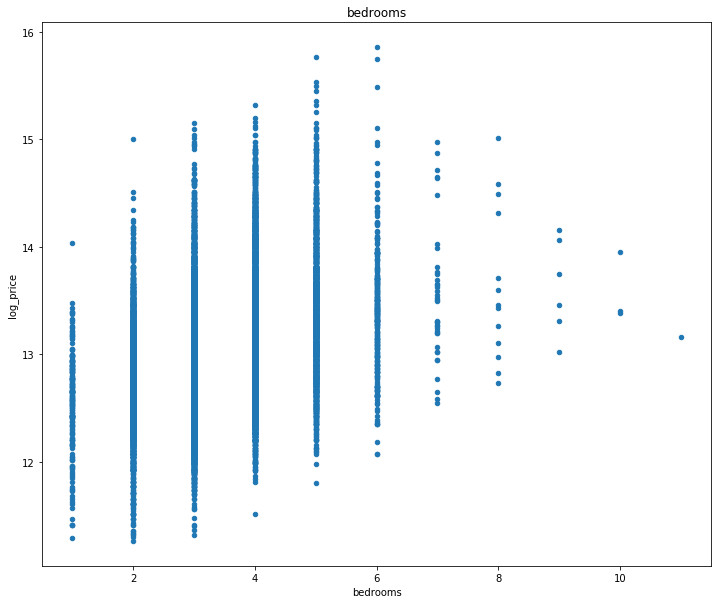

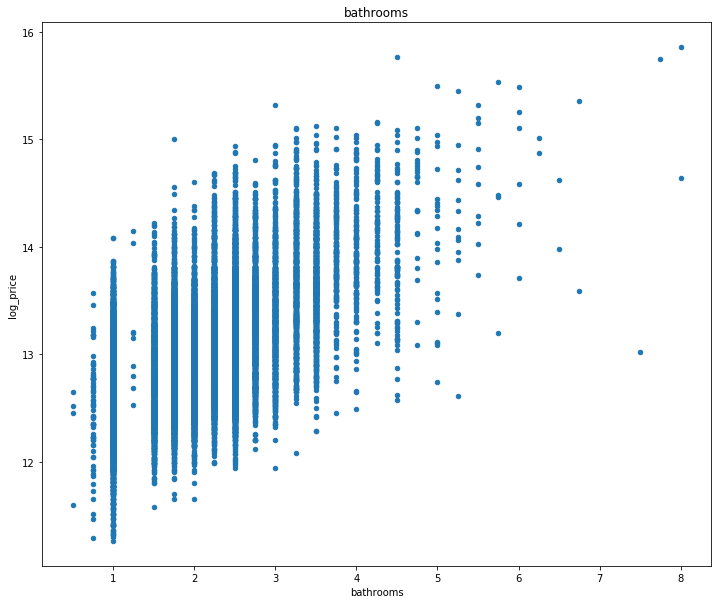

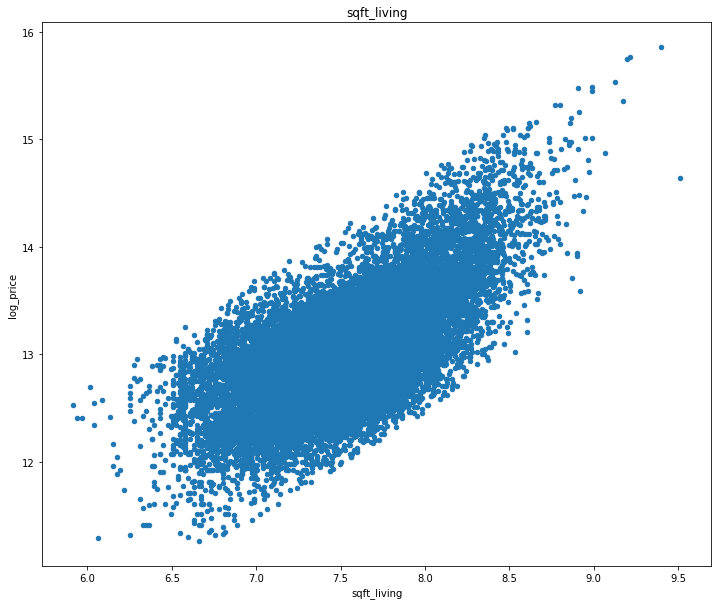

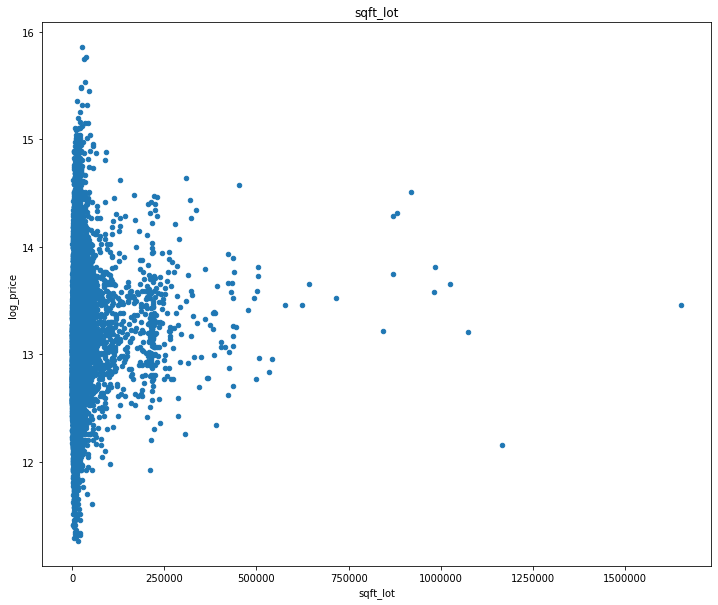

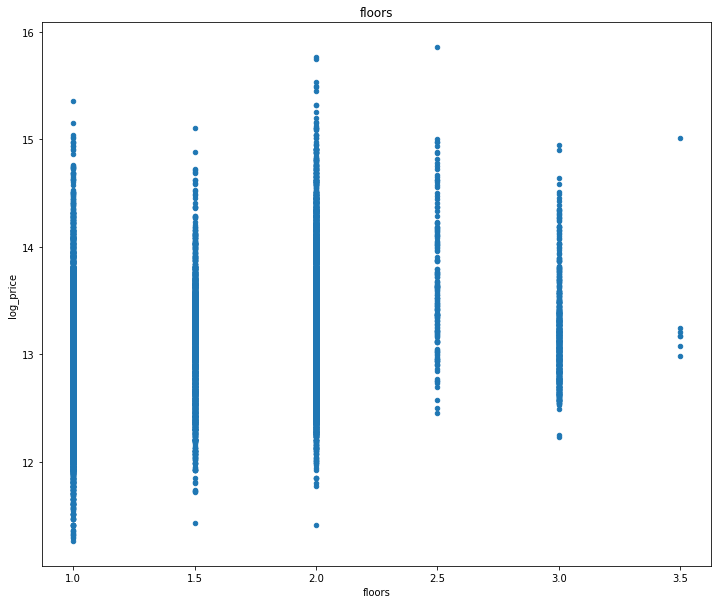

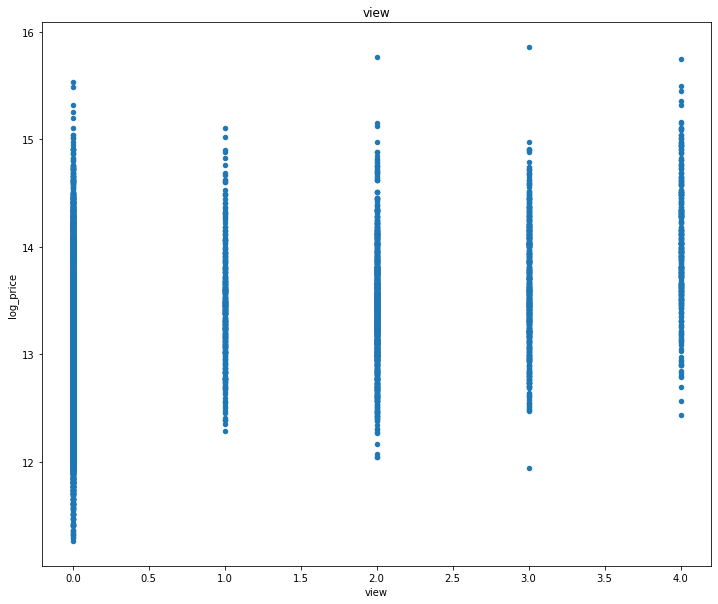

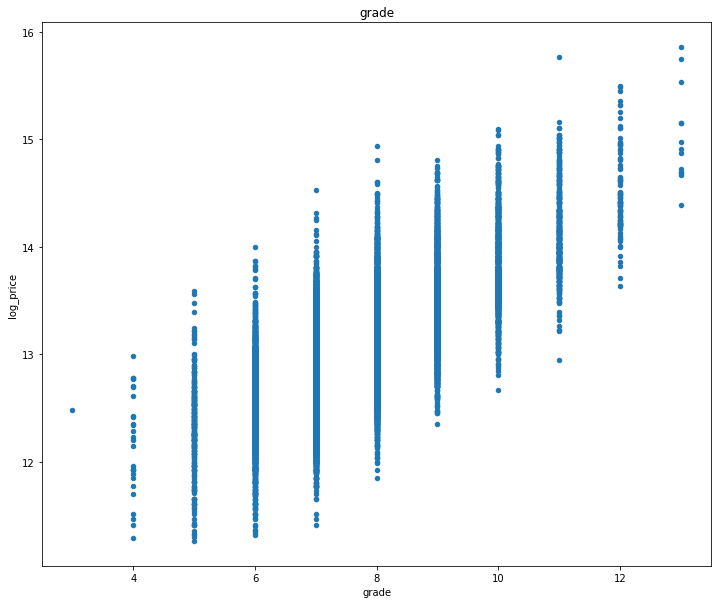

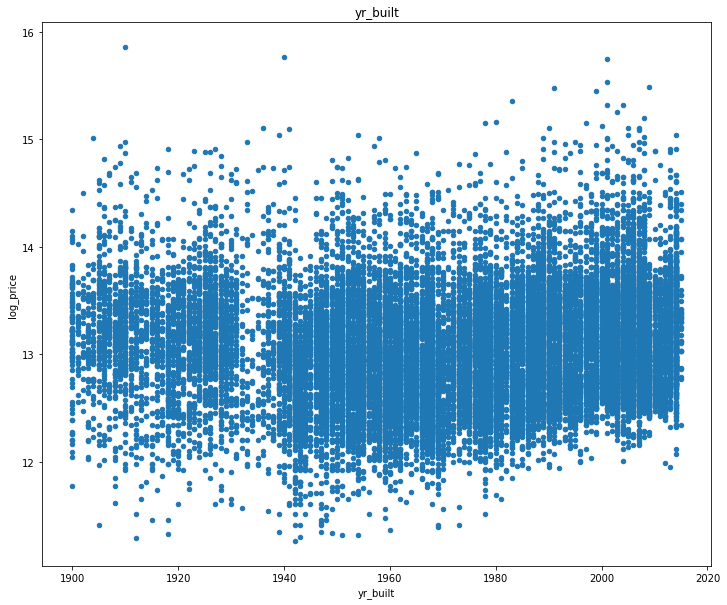

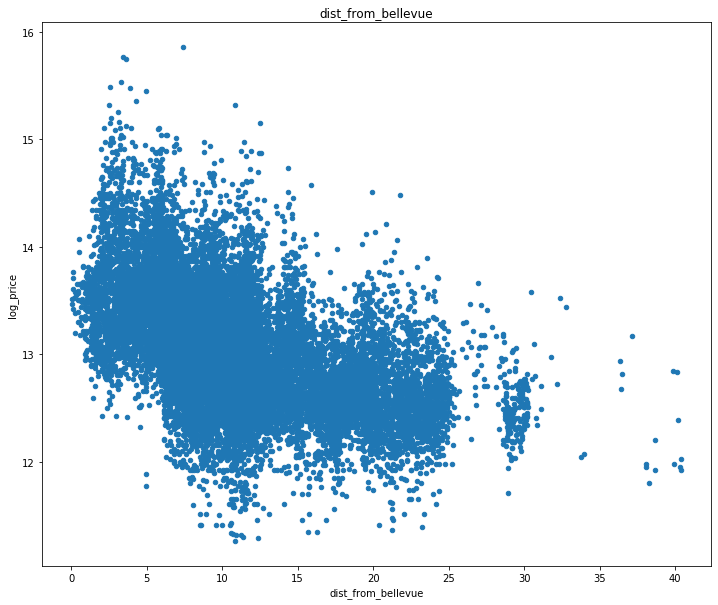

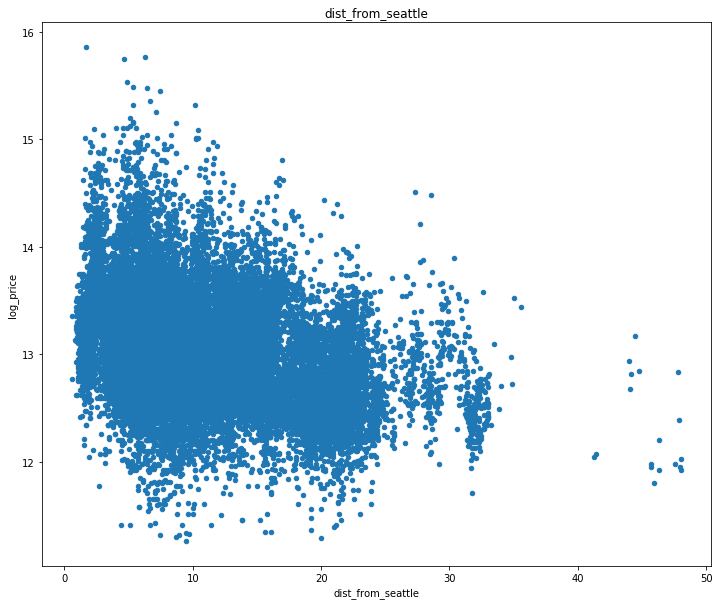

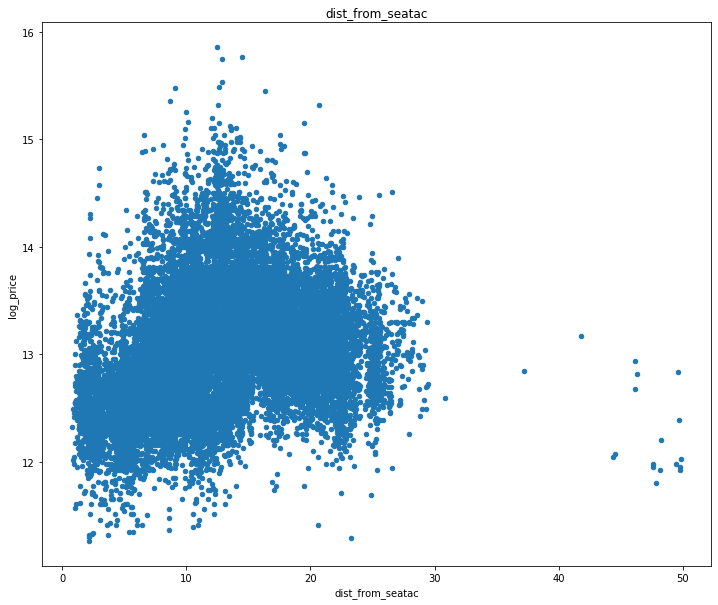

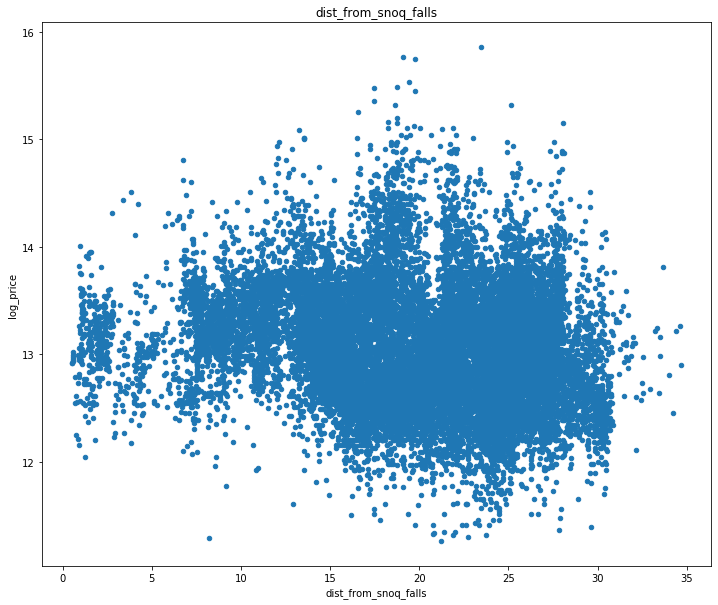

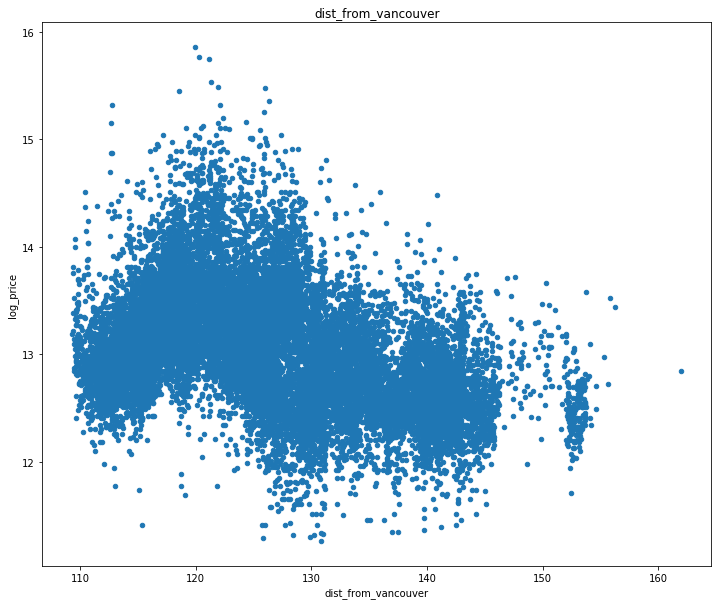

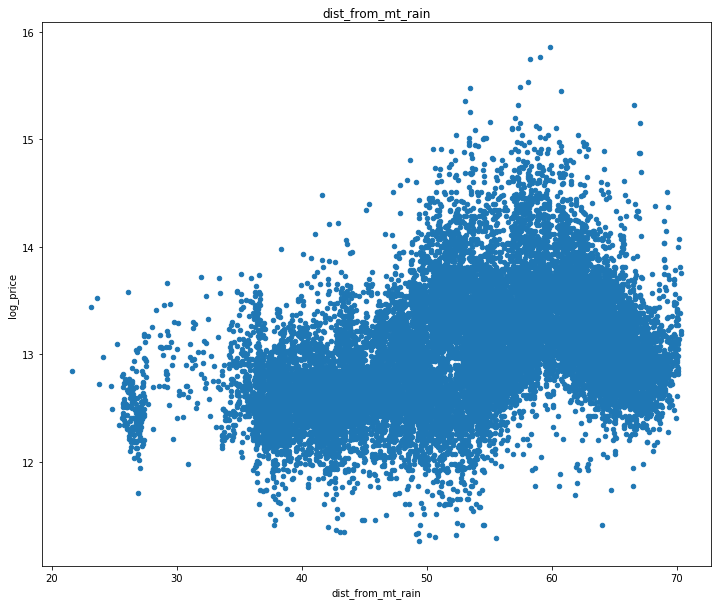

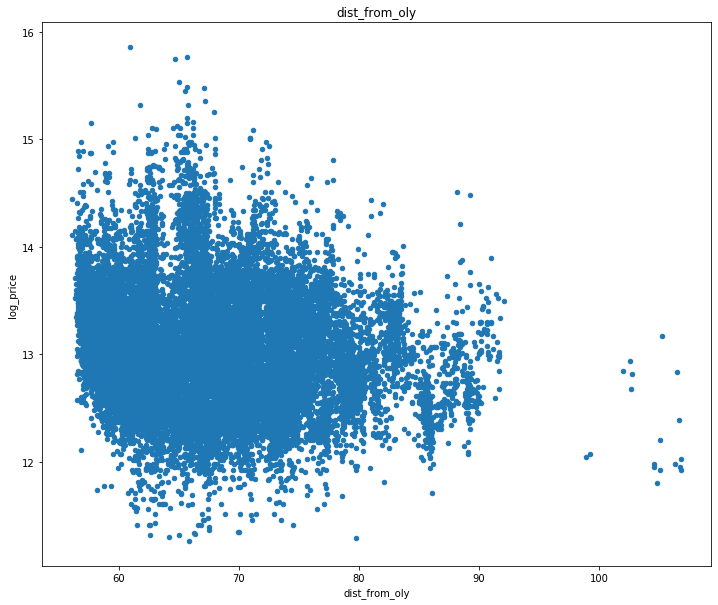

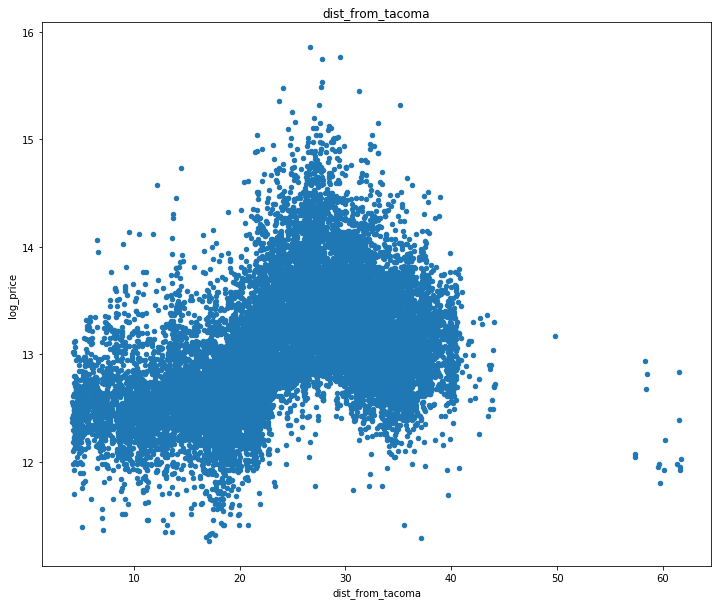

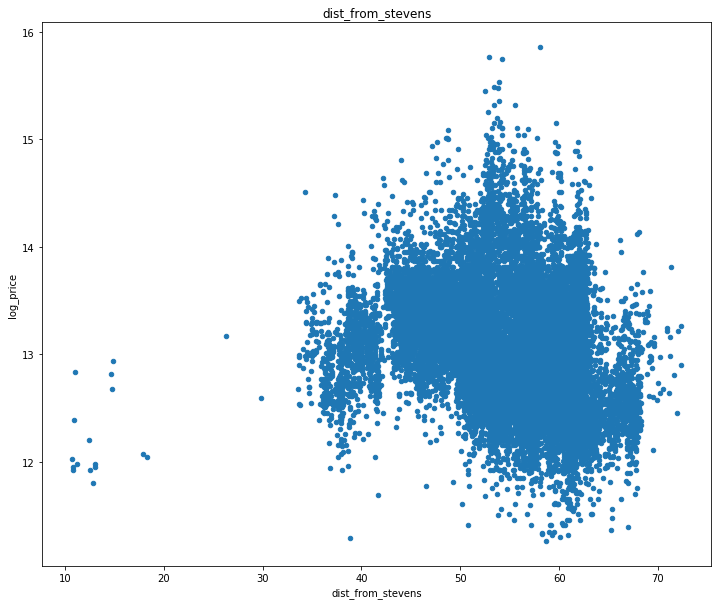

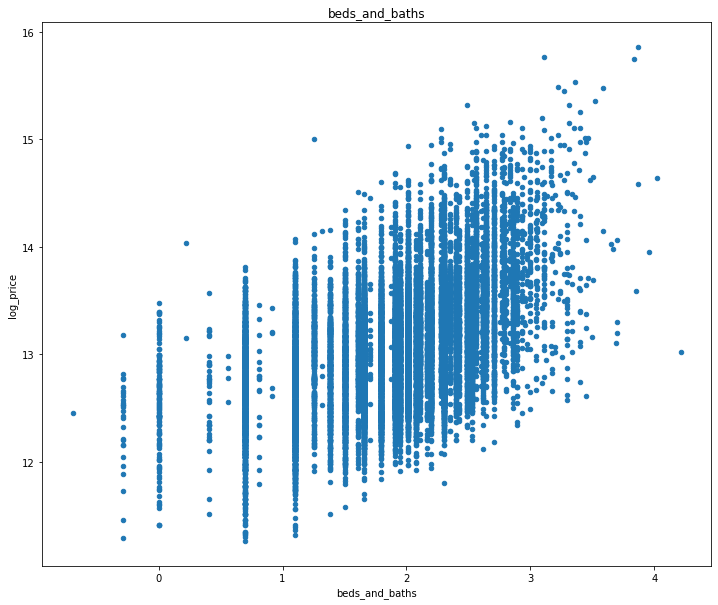

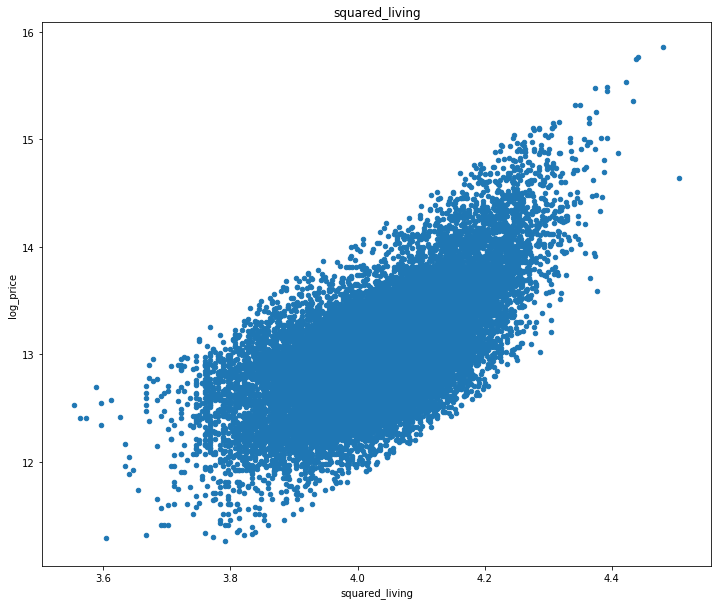

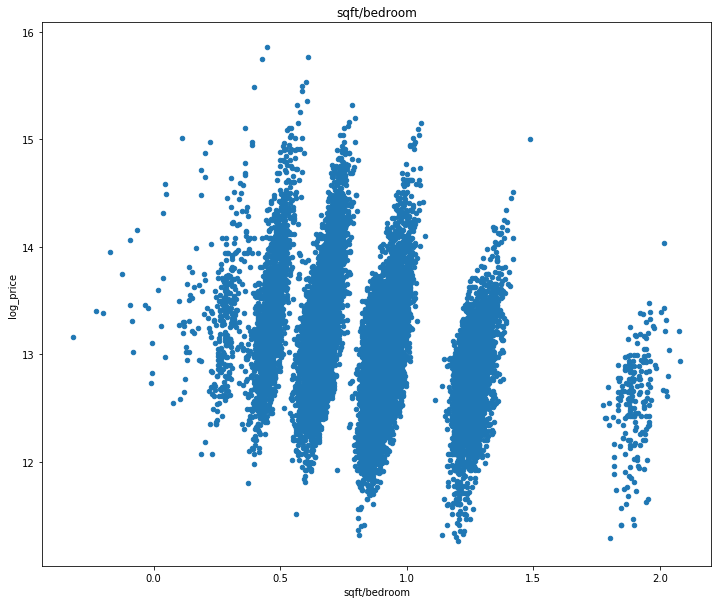

In [42]:
for feature in compiled_data.drop(to_exclude, axis=1).columns:
    compiled_data.plot(x=feature, y='log_price', kind='scatter', title=f"{feature}", figsize=(12,10));
    plt.savefig(f"{feature} with log(price).png")
    
    #multiple plots to visualize our log and actual prices versus our various variables

FileNotFoundError: [Errno 2] No such file or directory: 'sqft/bedroom with price.png'

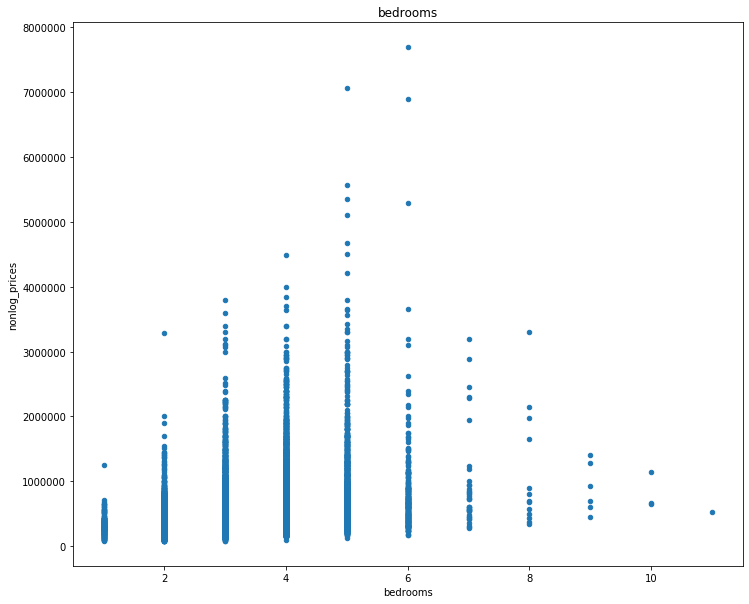

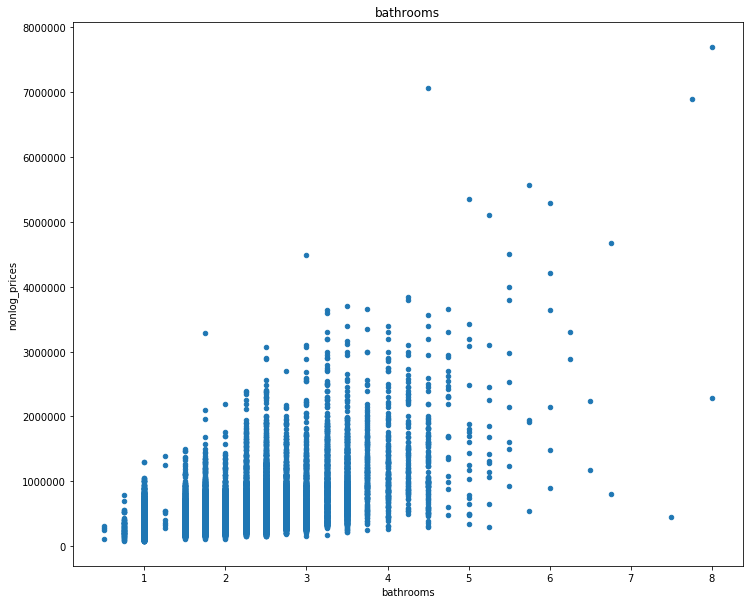

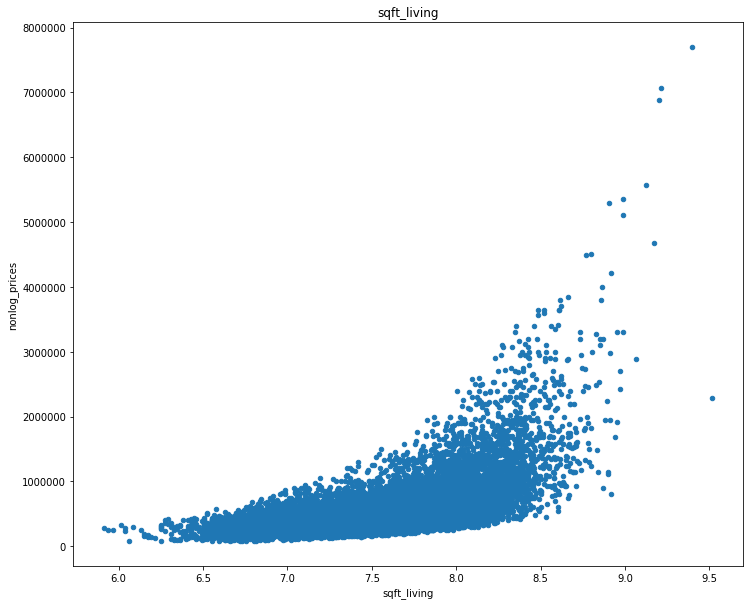

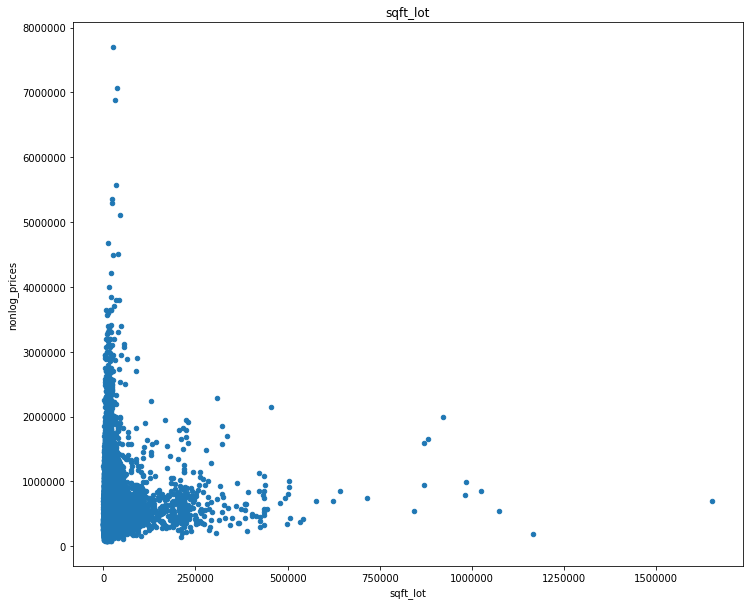

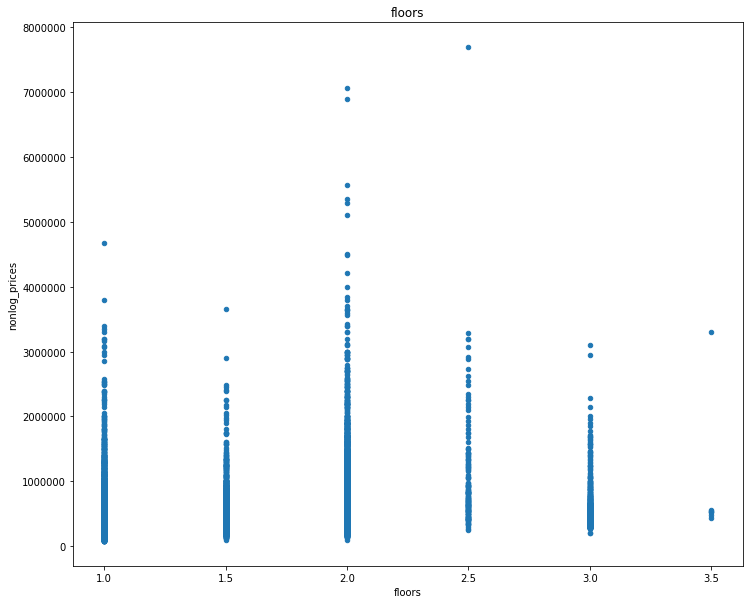

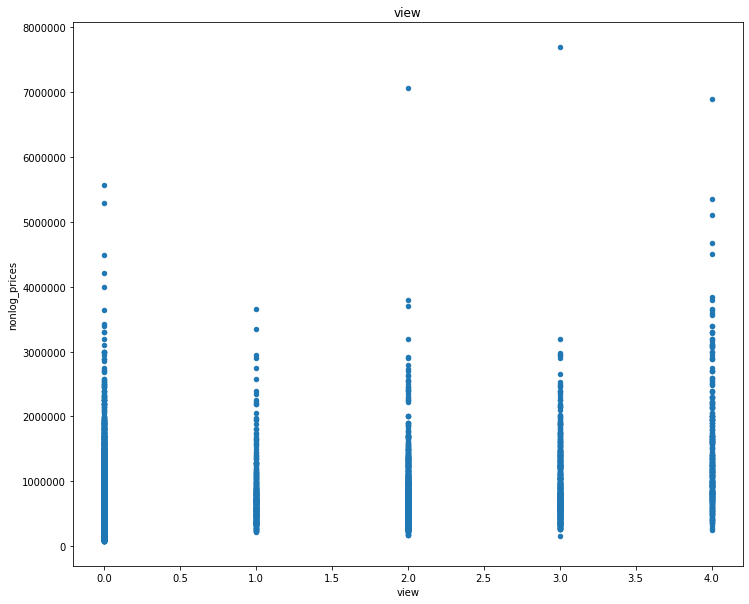

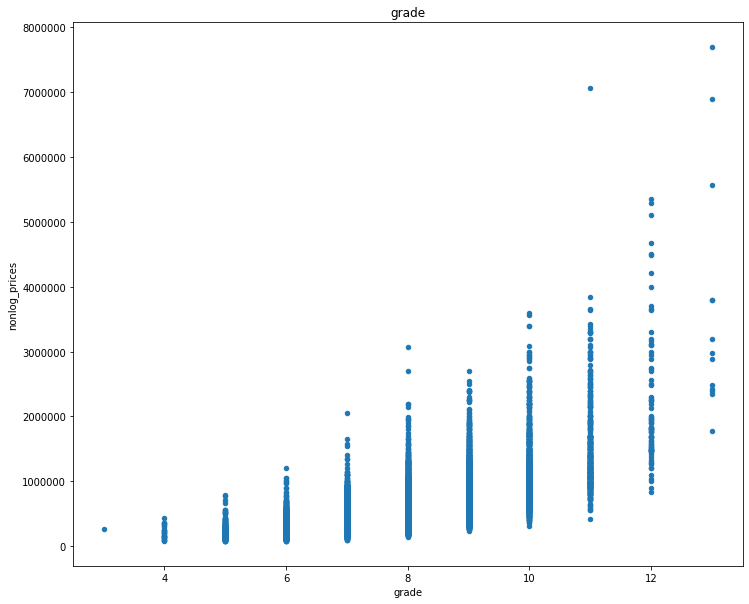

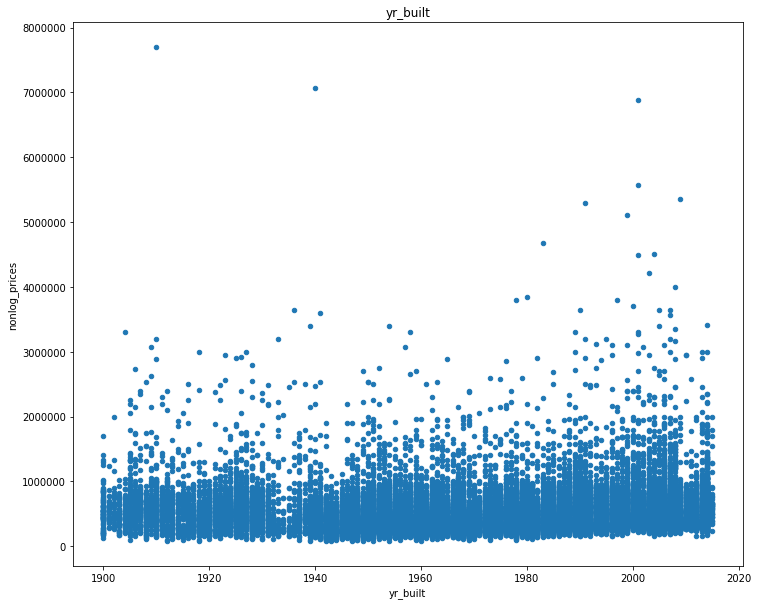

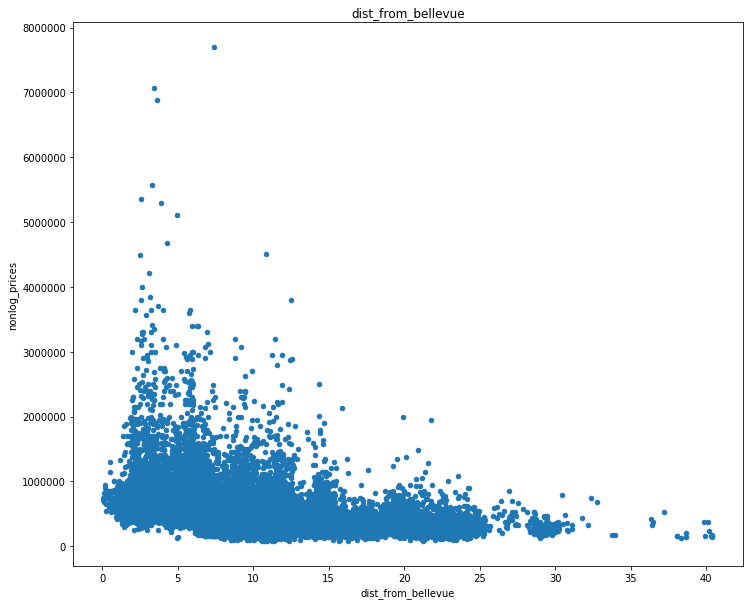

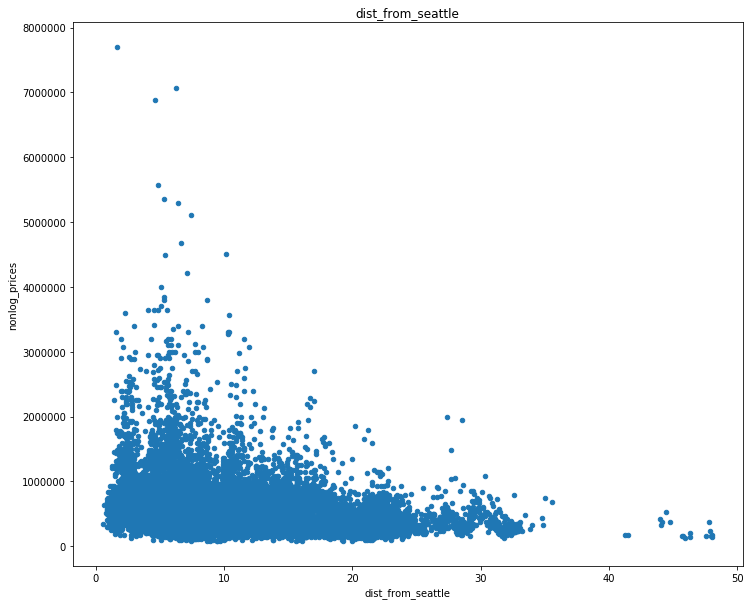

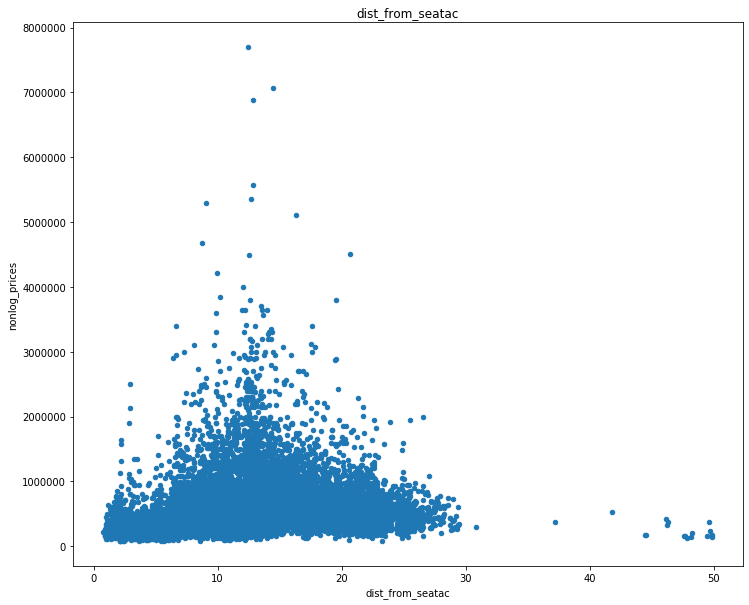

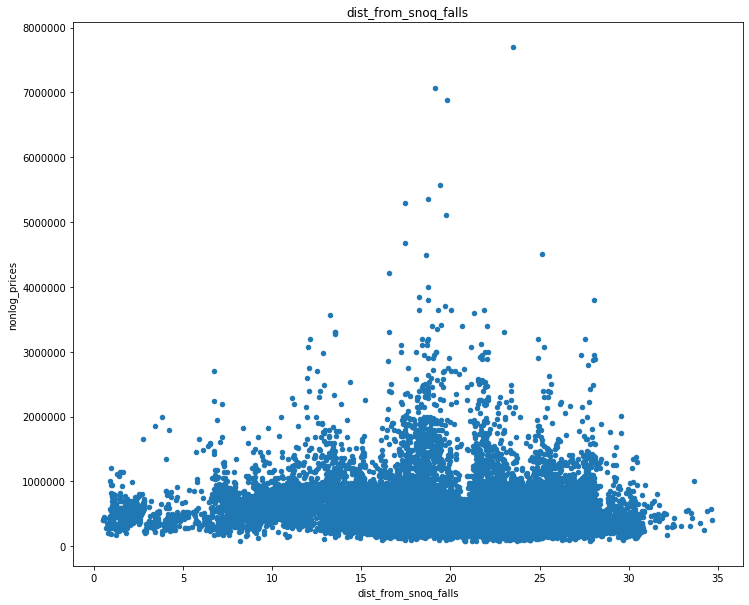

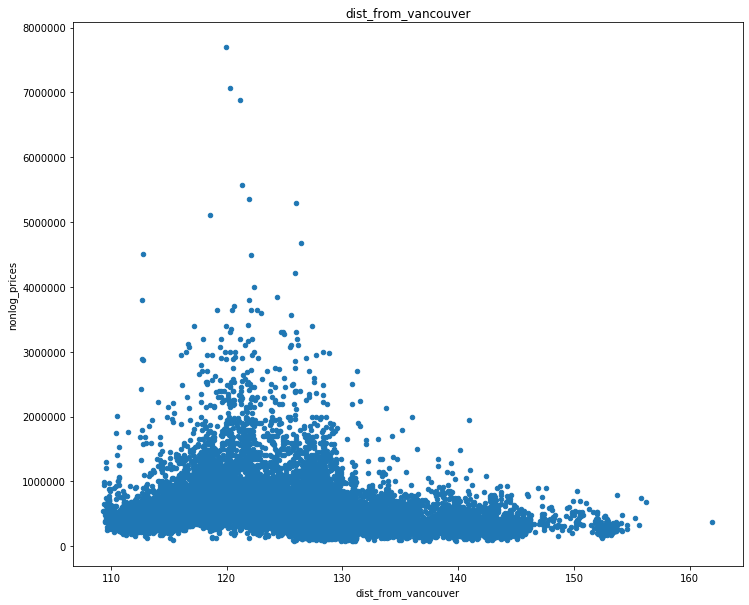

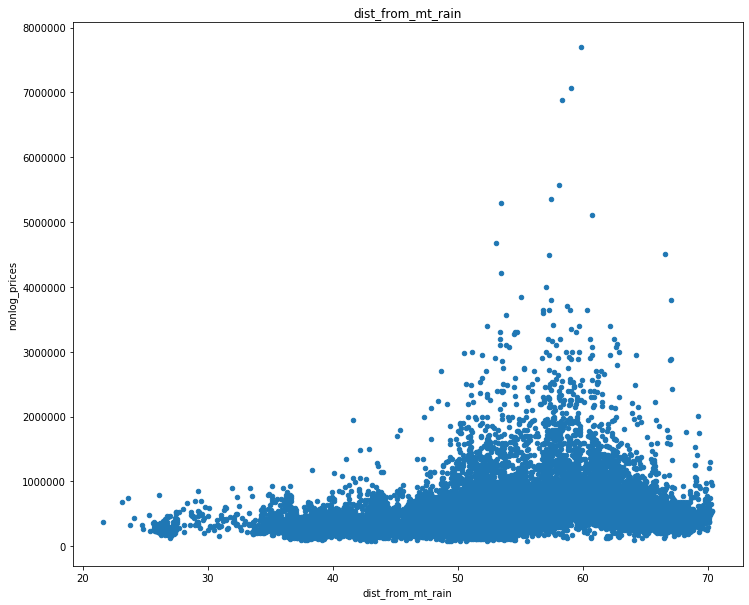

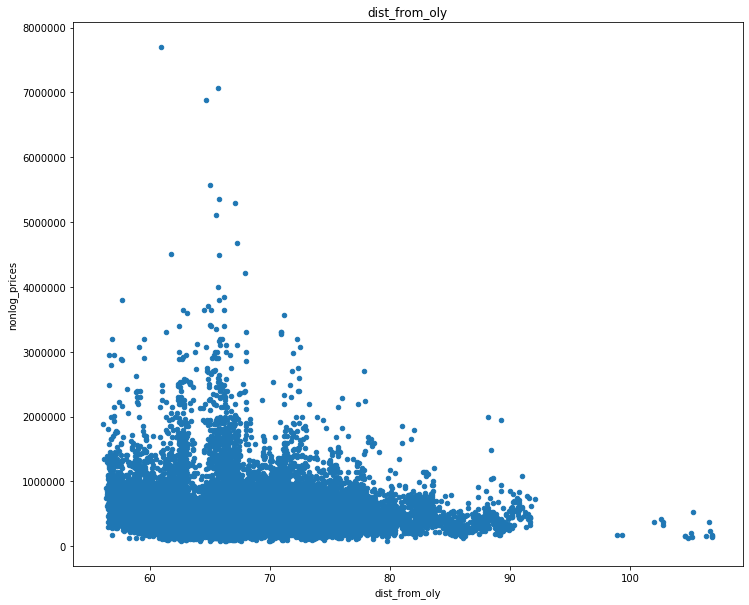

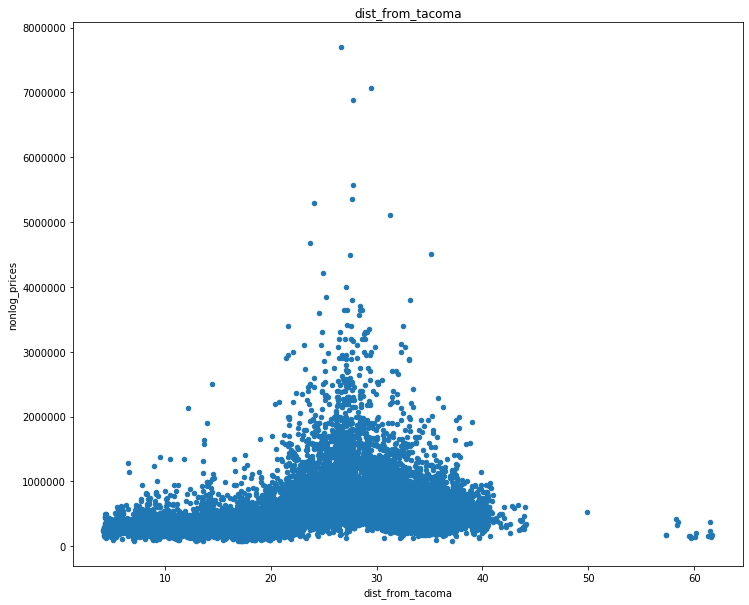

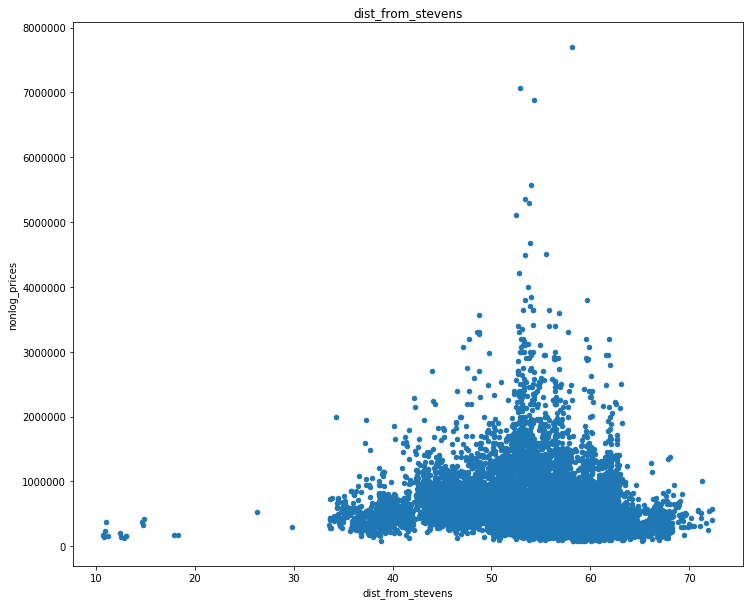

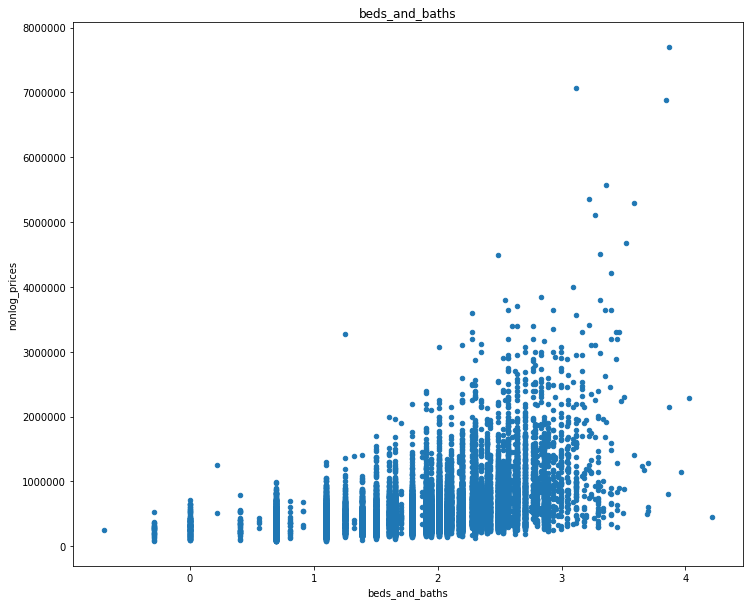

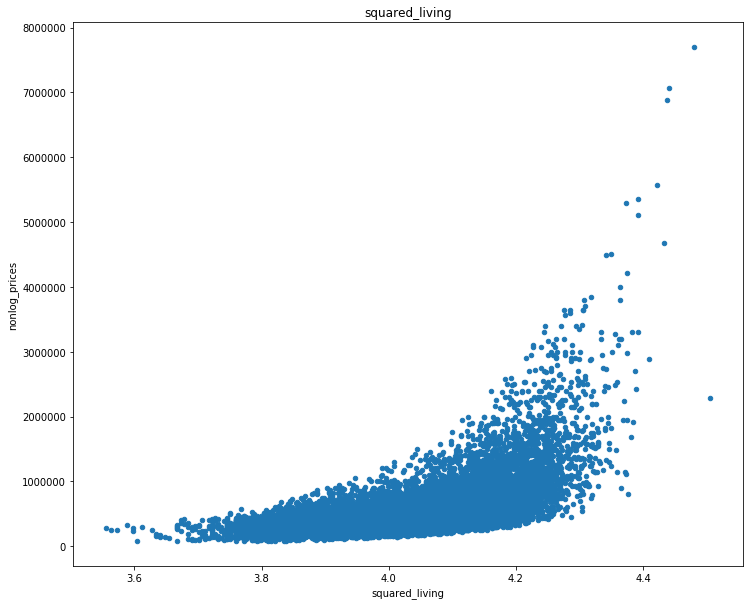

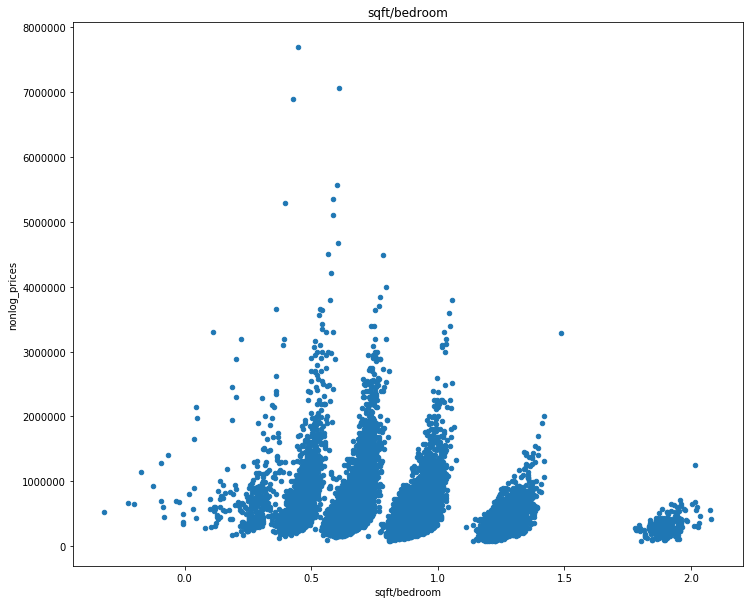

In [43]:
for feature in compiled_data.drop(to_exclude, axis=1).columns:
    compiled_data.plot(x=feature, y='nonlog_prices', kind='scatter', title=f"{feature}", figsize=(12,10));
    plt.savefig(f"{feature} with price.png")

In [48]:
lscv.coef_

array([-1.97433384e-03, -0.00000000e+00,  2.78530527e-02, -4.56578518e-03,
        3.45762692e-04, -5.98886992e-03, -7.66659112e-03,  6.60014814e-03,
       -6.70790013e-03, -1.56516940e-03, -2.00438998e-03, -3.47710553e-03,
       -5.95432898e-03, -1.18436278e-03,  2.96759034e-03, -1.13952802e-02,
        3.73540812e-03, -6.83117423e-04, -0.00000000e+00, -1.37351293e-03,
        3.79467959e-03, -1.02973885e-02, -4.73060538e-04,  1.57147122e-02,
        2.22160107e-02, -5.90397051e-03, -1.07890800e-03, -5.83117922e-03,
        5.05288915e-03, -3.26501177e-03, -8.61871296e-03, -8.49961158e-03,
       -1.91993540e-03,  3.50480931e-04,  1.05350935e-02, -1.03191352e-03,
       -9.36395072e-03, -0.00000000e+00,  1.64482880e-03, -4.26465752e-03,
        1.09676734e-03,  2.93863573e-03,  6.62234566e-03, -1.16964380e-02,
        3.52482573e-03, -1.57921341e-02,  6.57473697e-03,  1.28693039e-02,
        3.04243341e-03,  8.92365737e-03,  8.43643351e-03, -1.22403167e-02,
        8.41503395e-03, -

In [50]:
list(zip(lscv.coef_, X_train.columns))

[(-0.0019743338437340253, 'x0_98002'),
 (-0.0, 'x0_98003'),
 (0.027853052656053645, 'x0_98004'),
 (-0.004565785184704222, 'x0_98005'),
 (0.0003457626923063995, 'x0_98006'),
 (-0.005988869917703845, 'x0_98007'),
 (-0.0076665911210164524, 'x0_98008'),
 (0.006600148137425352, 'x0_98010'),
 (-0.006707900125076926, 'x0_98011'),
 (-0.0015651694025169654, 'x0_98014'),
 (-0.0020043899787348537, 'x0_98019'),
 (-0.0034771055264297074, 'x0_98022'),
 (-0.005954328976180814, 'x0_98023'),
 (-0.0011843627783693416, 'x0_98024'),
 (0.0029675903437207355, 'x0_98027'),
 (-0.011395280246900494, 'x0_98028'),
 (0.003735408120683963, 'x0_98029'),
 (-0.0006831174230191479, 'x0_98030'),
 (-0.0, 'x0_98031'),
 (-0.0013735129261359018, 'x0_98032'),
 (0.0037946795932431573, 'x0_98033'),
 (-0.010297388481631142, 'x0_98034'),
 (-0.00047306053779642575, 'x0_98038'),
 (0.015714712151473863, 'x0_98039'),
 (0.022216010704524402, 'x0_98040'),
 (-0.005903970513213782, 'x0_98042'),
 (-0.0010789080026529898, 'x0_98045'),
 (

Distance from both Seatac Airport and Vancouver have high coefficients. This could imply that people either need to be close for work or pleasure, contrarily this could also just show a higher density of houses that have minimized distance to those locations. We would need to explore further on the correlation of those features. Obviously the square feet of a home is a major factor in prices of homes and using that coupled with other factors that were on a scale helped the model learn(i.e. grade).

Our model, though not perfect, helps show the various factors that can affect house price in King County. Our root mean square error on that price is just over $130k for both the linear regression and through the lasso function meaning we can expect a variance in price to that amount when predicting a sale price for a home. By using data that takes into account data that spans more years, has more data from the more rural zipcodes for King County, and/or potentially grouping zipcodes into bins to help see the price based on an area versus arbitrary zipcodes may help make the model better. Our presentation mentions some next steps we would take given the time and tools to help improve the model but feel through our current iteration we could certainly make some business decisions based on our findings.